# Machine Learning Introduction

In this notebook, we will build some basic machine learning functions.

In [1]:
# import the libraries
from collections import Counter
import math, random

## Data Splitting

First, let's develop some routines that split data up for us in cross-validation

In [2]:
def split_data(data, prob):
    """split data into fractions [prob, 1 - prob]"""
    results = [], []
    for row in data:
        results[0 if random.random() < prob else 1].append(row)
    return results

def train_test_split(x, y, test_pct):
    data = list(zip(x, y))                        # pair corresponding values
    train, test = split_data(data, 1 - test_pct)  # split the dataset of pairs
    x_train, y_train = list(zip(*train))          # magical un-zip trick
    x_test, y_test = list(zip(*test))
    return x_train, x_test, y_train, y_test

## Correctness Measures

Now, let's make some functions that let us measure how well our algorithms are working

In [6]:
# tp - true positve,fp - fasle positive,fn - false negative,tn - true negative
def accuracy_calc(tp, fp, fn, tn):
    """(TP+TN)/N"""
    return (tp+tn)/(tp+fp+fn+tn)

def precision_calc(tp, fp, fn, tn):
    """TP/(TP+FP)"""
    return tp/(tp+fp)
    
def recall_calc(tp, fp, fn, tn):
    """TP/(TP+FN)"""
    return tp/(tp+fn)

def f1_score_calc(tp, fp, fn, tn):
    """Harmonic average of precision and recall"""
    p = precision_calc(tp,fp,fn,tn)
    r = recall_calc(tp,fp,fn,tn)
    return 2*p*r/(p+r)
    

### Test your code

Try this out with some problems. Give the accuracy, precision, recall, and f1-scores for the following:

NOTE: For the below questions, I have placed all the below correctly classified scenarios of positive and negative classes as list of tuples as (positive class, negative class).

Below I have defined a generic function which calculates the performance measures and displays them:
3. You have 100 objects: 10 of the positive class, and 90 of the negative class. Repeat 2., switching around the numbers for positive and negative class for each part.


In [7]:
# Generic function to calculate performance measures given tp,tn,fp,fn
def calc_perf_measures(x,y):
    index = 1 
    for positive,negative in x: #unpack the list of tuples of the form (correctly classified positive class,correctly classifed negative class)
        print("Scenario %d\n**********" %index)
        index+=1
        # Print the given parameters
        print("Given:\nTotal positve class = {0}, Total negative class = {1}\nCorrectly classified positive class(tp - true positives) = {2}\nCorrectly classified negative class(tn - true negatives) = {3}".format(y[0],y[1],positive,negative))
        # calculate the true positve, true negative, false positve, false negative
        tp = positive
        tn = negative
        fp = y[0]-positive
        fn = y[1]-negative
        print("False positves(fp) = {0}\nFalse Negatives(fn) = {1}\n".format(fp,fn))
        
        # print the accuracy, precision,recall and f1_score for all the scenarios
        print("Accuracy = {0}\nPrecision = {1}\nRecall = {2}\nf1_score = {3}\n\n".format(accuracy_calc(tp, fp, fn, tn),precision_calc(tp, fp, fn, tn),recall_calc(tp, fp, fn, tn),f1_score_calc(tp, fp, fn, tn)))

## Part 1

1. You have 100 objects: 50 of the positive class, and 50 of the negative class.
   - Correctly classifies 25 of the positive class, and 25 of the negative class.
   - Correctly classifies 10 of the positive class, and 40 of the negative class.
   - Correctly classifies 10 of the positive class, and 10 of the negative class.
   - Correctly classifies 40 of the positive class, and 10 of the negative class.
   - Correctly classifies 40 of the positive class, and 40 of the negative class.

In [8]:
# Make a list of the given correctly classified positive and negative class
correctly_classified_list = [(25,25),(10,40),(10,10),(40,10),(40,40)]
# Make a tuple of given total positive and negative classes
total_pos_neg_class = (50,50)

# call the generic function to calculate and display all performance measures
calc_perf_measures(correctly_classified_list,total_pos_neg_class)

Scenario 1
**********
Given:
Total positve class = 50, Total negative class = 50
Correctly classified positive class(tp - true positives) = 25
Correctly classified negative class(tn - true negatives) = 25
False positves(fp) = 25
False Negatives(fn) = 25

Accuracy = 0.5
Precision = 0.5
Recall = 0.5
f1_score = 0.5


Scenario 2
**********
Given:
Total positve class = 50, Total negative class = 50
Correctly classified positive class(tp - true positives) = 10
Correctly classified negative class(tn - true negatives) = 40
False positves(fp) = 40
False Negatives(fn) = 10

Accuracy = 0.5
Precision = 0.2
Recall = 0.5
f1_score = 0.28571428571428575


Scenario 3
**********
Given:
Total positve class = 50, Total negative class = 50
Correctly classified positive class(tp - true positives) = 10
Correctly classified negative class(tn - true negatives) = 10
False positves(fp) = 40
False Negatives(fn) = 40

Accuracy = 0.2
Precision = 0.2
Recall = 0.2
f1_score = 0.20000000000000004


Scenario 4
*********

## Part 2

2. You have 100 objects: 90 of the positive class, and 10 of the negative class.
   - Correctly classifies 45 of the positive class, and 5 of the negative class.
   - Correctly classifies 10 of the positive class, and 9 of the negative class.
   - Correctly classifies 10 of the positive class, and 1 of the negative class.
   - Correctly classifies 80 of the positive class, and 1 of the negative class.
   - Correctly classifies 10 of the positive class, and 9 of the negative class.

In [9]:
# Make a list of the given correctly classified positive and negative class
correctly_classified_list = [(45,5),(10,9),(10,1),(80,1),(10,9)]
# Make a tuple of given total positive and negative classes
total_pos_neg_class = (90,10)

# call the generic function to calculate and display all performance measures
calc_perf_measures(correctly_classified_list,total_pos_neg_class)

Scenario 1
**********
Given:
Total positve class = 90, Total negative class = 10
Correctly classified positive class(tp - true positives) = 45
Correctly classified negative class(tn - true negatives) = 5
False positves(fp) = 45
False Negatives(fn) = 5

Accuracy = 0.5
Precision = 0.5
Recall = 0.9
f1_score = 0.6428571428571429


Scenario 2
**********
Given:
Total positve class = 90, Total negative class = 10
Correctly classified positive class(tp - true positives) = 10
Correctly classified negative class(tn - true negatives) = 9
False positves(fp) = 80
False Negatives(fn) = 1

Accuracy = 0.19
Precision = 0.1111111111111111
Recall = 0.9090909090909091
f1_score = 0.198019801980198


Scenario 3
**********
Given:
Total positve class = 90, Total negative class = 10
Correctly classified positive class(tp - true positives) = 10
Correctly classified negative class(tn - true negatives) = 1
False positves(fp) = 80
False Negatives(fn) = 9

Accuracy = 0.11
Precision = 0.1111111111111111
Recall = 0.5

## Part 3

3) You have 100 objects: 10 of the positive class, and 90 of the negative class. Repeat 2., switching around the numbers for positive and negative class for each part.

In [10]:
# Make a list of the given correctly classified positive and negative class
correctly_classified_list = [(5,45),(9,10),(1,10),(1,80),(9,10)]
# Make a tuple of given total positive and negative classes
total_pos_neg_class = (10,90)

# call the generic function to calculate and display all performance measures
calc_perf_measures(correctly_classified_list,total_pos_neg_class)

Scenario 1
**********
Given:
Total positve class = 10, Total negative class = 90
Correctly classified positive class(tp - true positives) = 5
Correctly classified negative class(tn - true negatives) = 45
False positves(fp) = 5
False Negatives(fn) = 45

Accuracy = 0.5
Precision = 0.5
Recall = 0.1
f1_score = 0.16666666666666669


Scenario 2
**********
Given:
Total positve class = 10, Total negative class = 90
Correctly classified positive class(tp - true positives) = 9
Correctly classified negative class(tn - true negatives) = 10
False positves(fp) = 1
False Negatives(fn) = 80

Accuracy = 0.19
Precision = 0.9
Recall = 0.10112359550561797
f1_score = 0.18181818181818182


Scenario 3
**********
Given:
Total positve class = 10, Total negative class = 90
Correctly classified positive class(tp - true positives) = 1
Correctly classified negative class(tn - true negatives) = 10
False positves(fp) = 9
False Negatives(fn) = 80

Accuracy = 0.11
Precision = 0.1
Recall = 0.012345679012345678
f1_score

## Scikit-learn and Iris

Let's now play with some data, called the Iris data set. We will also begin to learn how to use the scikit-learn library.

In [11]:
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn import neighbors, datasets
from sklearn.decomposition import PCA
import numpy as np

([], <a list of 0 Text yticklabel objects>)

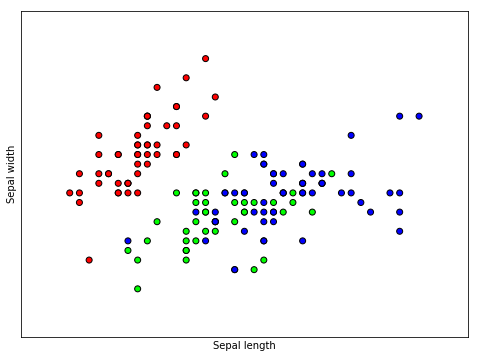

In [12]:
# import the iris dataset
iris = datasets.load_iris()
X = iris.data[:,:2] # we will only use the first two features
y = iris.target
#x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
# plot the iris dataset where the color of each class is different
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

What do you notice about the three classes?

The iris data is four-dimensional. Let's use PCA to plot the 4-dimensional features in 2 and 3 dimensions.

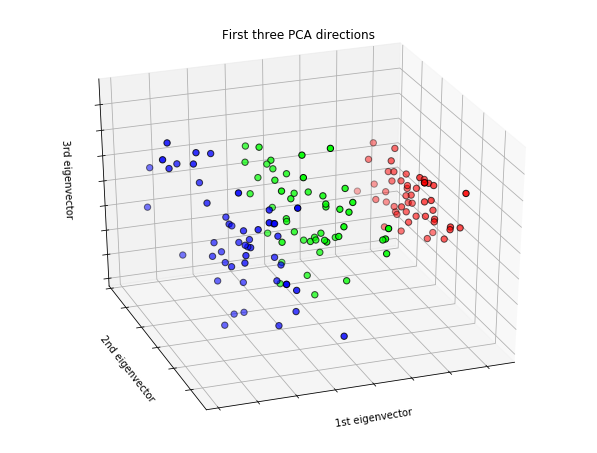

In [13]:
# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=cmap_bold, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# now make a plot of the first two PCA components

## Nearest-neighbor classification

One of the most basic classifiers is the k-nearest neighbor classifier. It simply classifies data by finding the nearest objects in the training set and looking at their labels.



*************Number of neighbors = 15***************




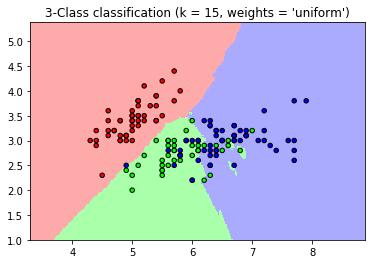

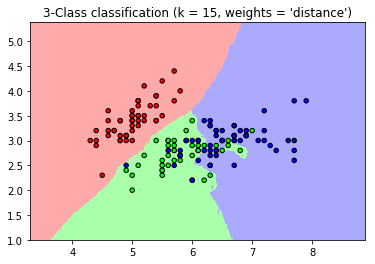



*************Number of neighbors = 30***************




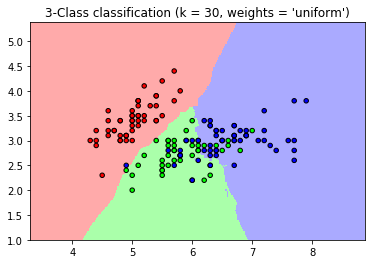

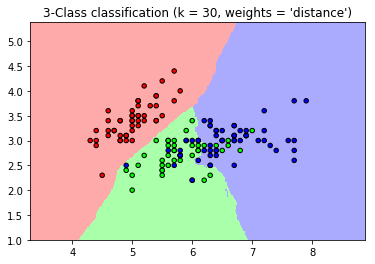



*************Number of neighbors = 45***************




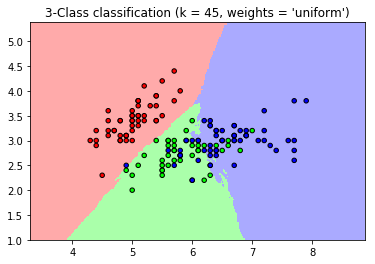

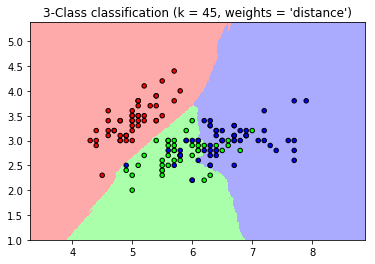



*************Number of neighbors = 60***************




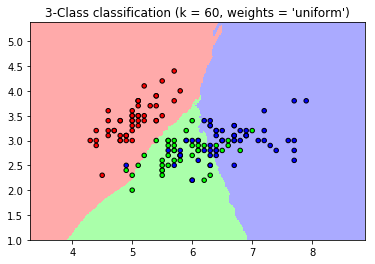

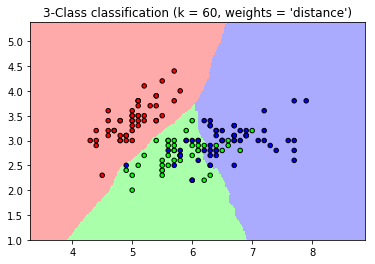



*************Number of neighbors = 75***************




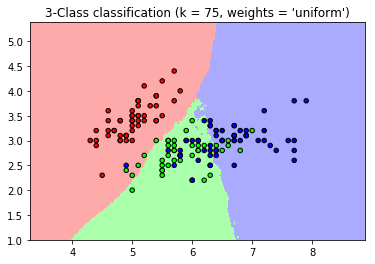

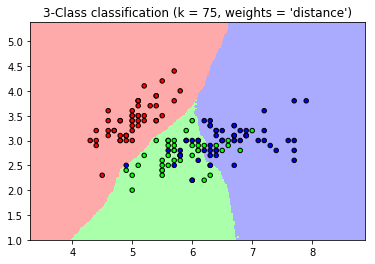

In [14]:
h = .02  # step size in the mesh
n_neighbors_list = [15,30,45,60,75] # number of neighbors to use in classification

for n_neighbors in n_neighbors_list:
    print("\n\n*************Number of neighbors = "+str(n_neighbors)+"***************\n\n")
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)
    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

    plt.show()

## Bias and Variance in Nearest Neighbor classifiers
Change n_neighbors in the above classifier and observe how the classification surfaces change. How does this relate to bias and variance?

## Analysis :
As we can see from the below graphs, The "Number of neghinors, K" acts as a smoother. In other words, as the number of neighbors increase the boundaries become more smoother.

1) For low values of "K" - there is large variance and low bias as the boundaries are more stringent in nature i.e the boundaries are not smooth.

2) For high values of "K" - there is low variance and high bias as the boundaries are more smoothed out.

******************* Number of neighbors = 5 ********************


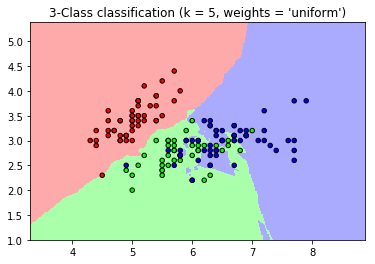

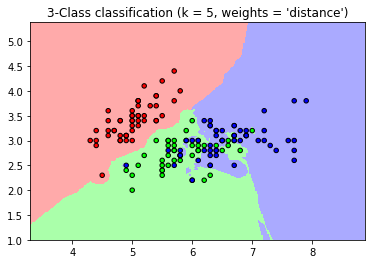

******************* Number of neighbors = 15 ********************


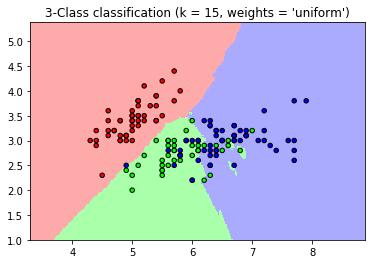

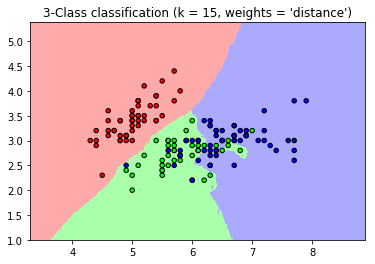

******************* Number of neighbors = 30 ********************


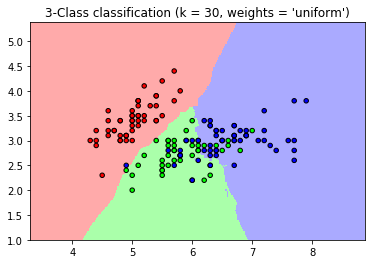

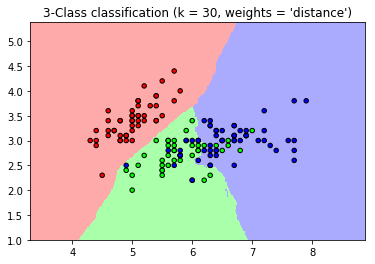

******************* Number of neighbors = 45 ********************


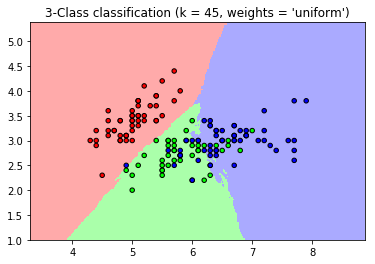

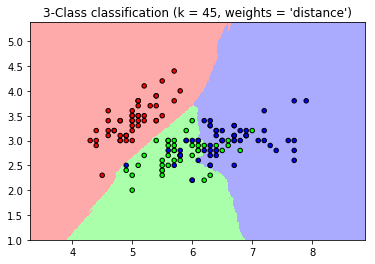

In [15]:
h = .02  # step size in the mesh
n_neighbors_list = [5,15,30,45] # list of number of neighbors to use in classification

for n_neighbors in n_neighbors_list:
    print("******************* Number of neighbors = "+str(n_neighbors)+" ********************")
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

    plt.show()

Next, use the split routine to separate the iris dataset in 80% training data and 20% testing data. Then use the nearest neighbor classifier to look at the four performance measures vs. different n_neighbor values. Try this with both the uniform and distance weighted classifiers.

In [16]:
# Use all of the iris data
X = iris.data
y = iris.target

# Split the data into training and testing
Xtrain, Xtest,ytrain, ytest = train_test_split(X, y, 0.2)

## NN Classifier Project

## NOTE: To evaluate the performance measures for the KNN classifier algorithm based on the requirements, I have created a generic function called "KNN" which is called in both first and second question.

* The function models a KNN classifier using the training dataset and predicts the labels on a test dataset.
* We then obtain the confusion matrix for each K value and for both "uniform" and "distance" weights.
* Obtain "True positives(Tp), True negatives(Tn), False positives(Fp) and False Negatives(Fn) from the confusion matrix as shown in below diagram. 
* We then calculate the classwise accuracy, precision, recall and f1_score for each K value.
* We also calcualte the macro and micro averages of all the performance measures based on the formulae and logic provided below: 
* As we can see from above formulae, The macro-average is average of performance measures of each class and micro average puts emphasis on larger classes.
* We then perform a 10-Fold cross validation to obtain the misclassification error for each value of K to obtain the best optimal and least optimal value of "Number of neighbors".
* We then plot the micro and macro averages of performance measures along with classwise calculation of the same for both "uniform" and "distance" weights.
* Plot the misclassification error vs Number of neighbors to visualize the optimal and worst values of K.

In [21]:
import pandas as pd
import matplotlib.pyplot as py
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score

def KNN(Xtrain, Xtest,ytrain, ytest):
    cv_scores = []
    n_neighbors_list = range(1,51,1) # Range of "Number of neighbors" from 1 to 50
    
    # Plot the performance measures and perform cross validation to obtain optimal and least optimal number of neighbors for both "Uniform" and "Distance" weights.
    for weights in ['uniform', 'distance']:
        accuracy_micro = []; precision_micro = []; recall_micro = []; f1_score_micro = [];
        accuracy_macro = []; precision_macro = []; recall_macro = []; f1_score_macro = [];
        classwise_accuracy = []; classwise_precision = []; classwise_recall = []; classwise_f1_score = [];
        cv_scores = []
    
        for n_neighbors in n_neighbors_list:
            # we create an instance of Neighbours Classifier and fit the data.
            clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
            clf.fit(Xtrain, ytrain)
            # predict the labels for the test dataset
            Z = clf.predict(Xtest)
            
            # using pandas crosstab funtionality we obtain the confusion matrix
            actual = pd.Series(ytest, name="Actual")
            predicted = pd.Series(Z, name="predicted")
            a = pd.crosstab(actual,predicted)
            
            # Calculate the fp, fn, tp, tn values
            FP = sum((a.sum(axis=0) - np.diag(a)).tolist())
            FN = sum((a.sum(axis=1) - np.diag(a)).tolist())
            TP = sum(np.diag(a).tolist())
            TN = a.values.sum() - (FP + FN + TP)
            
            # Calcualte performance measures classwise
            ca = (np.sum(a)-a.sum(axis=0)-a.sum(axis=1)+2*np.diag(a))/np.sum(a)
            classwise_accuracy.append(ca*100)
        
            cp = np.diag(a)/a.sum(axis=0)
            classwise_precision.append(cp*100)
        
            cr = np.diag(a)/a.sum(axis=1)
            classwise_recall.append(cr*100)
        
            cf = (2*cp*cr)/(cp+cr)
            classwise_f1_score.append(cf*100)
            
            # Calcualte the macro averages of the performance measures
            accuracy_macro.append(np.average(ca)*100)
            precision_macro.append(np.average(cp)*100)
            recall_macro.append(np.average(cr)*100)
            f1_score_macro.append(np.average(cf)*100)
        
            # Calculate the micro averages of the performance measures
            accuracy_micro.append(accuracy_calc(TP,FP,FN,TN)*100)
            precision_micro.append(precision_calc(TP,FP,FN,TN)*100)
            recall_micro.append(recall_calc(TP,FP,FN,TN)*100)
            f1_score_micro.append(f1_score_calc(TP,FP,FN,TN)*100)
            
            # Perform a 10 fold cross validation to obtain the cross-validation scores. The scoring is based on accuracy.
            scores = cross_val_score(clf, Xtrain, ytrain, cv=10, scoring='accuracy')
            cv_scores.append(scores.mean())
        
        # Plot the micro and macro avreages of the performance measures for all values of K from 1 to 50
        fig, ((ax1, ax2, ax3, ax4)) = py.subplots(nrows=1, ncols=4,figsize=(15,5))
        fig.suptitle("\n\nUsing weights ='"+weights+"'\n**************************\n\nMacro and Micro Averaging for classifier performance measures",fontsize=16)
        ax1.plot(n_neighbors_list,accuracy_micro,label="Micro Averaging")
        ax1.plot(n_neighbors_list,accuracy_macro,label="Macro Averaging")
        ax1.set_xlabel("Number of neighbors, K");ax1.set_ylabel("Accuracy(%)")
        ax2.plot(n_neighbors_list,precision_micro,label="Micro Averaging")
        ax2.plot(n_neighbors_list,precision_macro,label="Macro Averaging")
        ax2.set_xlabel("Number of neighbors, K");ax2.set_ylabel("Precision(%)")
        ax3.plot(n_neighbors_list,recall_micro,label="Micro Averaging")
        ax3.plot(n_neighbors_list,recall_macro,label="Macro Averaging")
        ax3.set_xlabel("Number of neighbors, K");ax3.set_ylabel("Recall(%)")
        ax4.plot(n_neighbors_list,f1_score_micro,label="Micro Averaging")
        ax4.plot(n_neighbors_list,f1_score_macro,label="Macro Averaging")
        ax4.set_xlabel("Number of neighbors, K");ax4.set_ylabel("F1 Score(%)")
        
        classwise_accuracy = np.array(classwise_accuracy)
        classwise_precision = np.array(classwise_precision)
        classwise_recall = np.array(classwise_recall)
        classwise_f1_score = np.array(classwise_f1_score)
        
        # Plot the classwise performance measures for all values of K from 1 to 50
        fig1, ((ax5, ax6, ax7, ax8)) = py.subplots(nrows=1, ncols=4,figsize=(15,4))
        fig1.suptitle("Classwise performance measures",fontsize=16)
    
        ax5.plot(n_neighbors_list,classwise_accuracy[:,0],label="Class 1")
        ax5.plot(n_neighbors_list,classwise_accuracy[:,1],label="Class 2")
        ax5.plot(n_neighbors_list,classwise_accuracy[:,2],label="Class 3")
        ax5.set_xlabel("Number of neighbors, K");ax5.set_ylabel("Accuracy(%)")
        ax6.plot(n_neighbors_list,classwise_precision[:,0],label="Class 1")
        ax6.plot(n_neighbors_list,classwise_precision[:,1],label="Class 2")
        ax6.plot(n_neighbors_list,classwise_precision[:,2],label="Class 3")
        ax6.set_xlabel("Number of neighbors, K");ax6.set_ylabel("Precision(%)")
        ax7.plot(n_neighbors_list,classwise_recall[:,0],label="Class 1")
        ax7.plot(n_neighbors_list,classwise_recall[:,1],label="Class 2")
        ax7.plot(n_neighbors_list,classwise_recall[:,2],label="Class 3")
        ax7.set_xlabel("Number of neighbors, K");ax7.set_ylabel("Recall(%)")
        ax8.plot(n_neighbors_list,classwise_f1_score[:,0],label="Class 1")
        ax8.plot(n_neighbors_list,classwise_f1_score[:,1],label="Class 2")
        ax8.plot(n_neighbors_list,classwise_f1_score[:,2],label="Class 3")
        ax8.set_xlabel("Number of neighbors, K");ax8.set_ylabel("F1 Score(%)")
    
        fig.tight_layout()
        fig1.tight_layout()
        fig.subplots_adjust(top=0.7)
        fig1.subplots_adjust(top=0.85)
        
        # Show legends for all the plots
        ax1.legend(loc='best', shadow=True)
        ax2.legend(loc='best', shadow=True)
        ax3.legend(loc='best', shadow=True)
        ax4.legend(loc='best', shadow=True)
        ax5.legend(loc='best', shadow=True)
        ax6.legend(loc='best', shadow=True)
        ax7.legend(loc='best', shadow=True)
        ax8.legend(loc='best', shadow=True)
        py.show()
        
        # Plot the misclassification error for all values of K from 1 to 50
        print("\n\n")
        py.figure(figsize=(18,8))
        py.xlabel('Number of Neighbors K')
        py.ylabel('Misclassification Error')
        py.title('10 fold cross validation to find optimal K value\n',fontsize=16)

        MCE = [1 - x for x in cv_scores]
        py.plot(n_neighbors_list,MCE)
        py.show()
        
        # Obtain the optimal and worst K values for each weights
        optimal_k = n_neighbors_list[MCE.index(min(MCE))]
        print("* The optimal number of neighbors is "+str(optimal_k)+" for '"+weights+"' weights")
        worst_k = n_neighbors_list[MCE.index(max(MCE))]
        print("* The least optimal number of neighbors is "+str(worst_k)+" for '"+weights+"' weights")
        print("* The average misclassification percentage = "+str(np.average(np.array(MCE))*100)+"% for '"+weights+"' weights")
            
    return None

## Question 1
1) Plot accuracy, precision, recall, and f1-score vs. the number of neighbors with a 20% test split on the iris data using all 4 features. Use number of neighbors from 1 to 50 with both uniform and distance weighted classifiers. Comment on the results. Which classifier would you choose if you could only choose one? (That is, what value of n_neighbors would you choose and what kind of weight?)

## Analysis:
1) Based on the below results optimal and least optimal K values are:

* The optimal number of neighbors is 3 for 'uniform' weights
* The least optimal number of neighbors is 49 for 'uniform' weights
* The optimal number of neighbors is 3 for 'distance' weights
* The least optimal number of neighbors is 33 for 'distance' weights

2) Best weights for classifier

* The average misclassification percentage = 3.55303030303% for 'distance' weights
* The average misclassification percentage = 5.94666666667% for 'uniform' weights
We can see from above that using a distance weight provides less overall misclassification. Moreover by definition:

* 'uniform weights': All points in each neighborhood are weighted equally.
* ‘distance weights’: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

As weights functions are used for prediction (which is essentially the voting system), I believe that using "distance" weights is a better voting system and a slightly more principled approach that giving arbitrary weights as in uniform weights. By which I conclude that using "distance" weights are better classifiers than "uniform" weights.

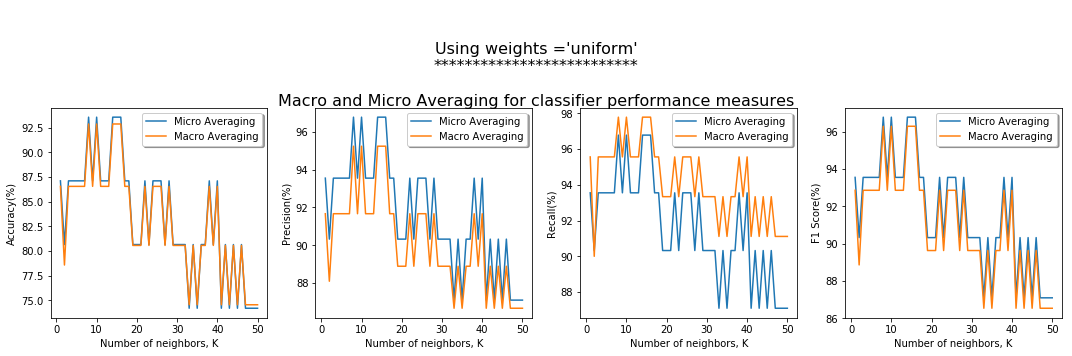

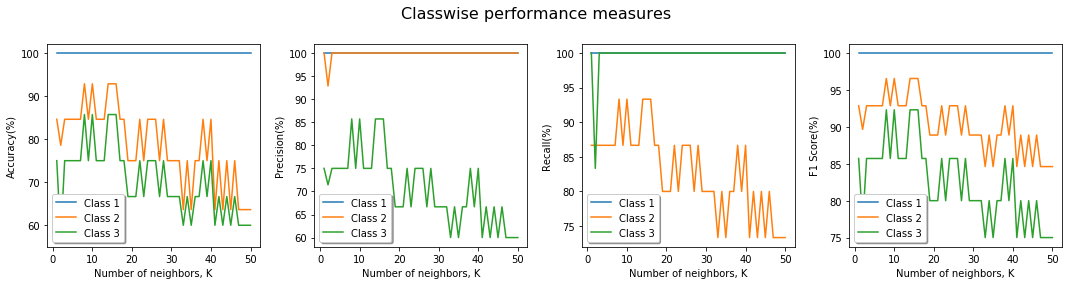

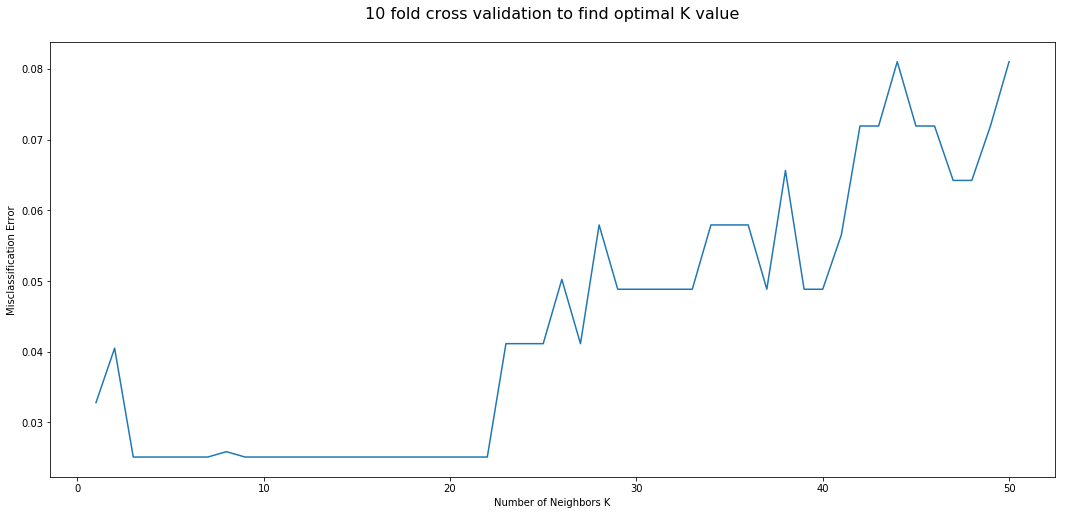

* The optimal number of neighbors is 3 for 'uniform' weights
* The least optimal number of neighbors is 44 for 'uniform' weights
* The average misclassification percentage = 4.3714452214452155% for 'uniform' weights


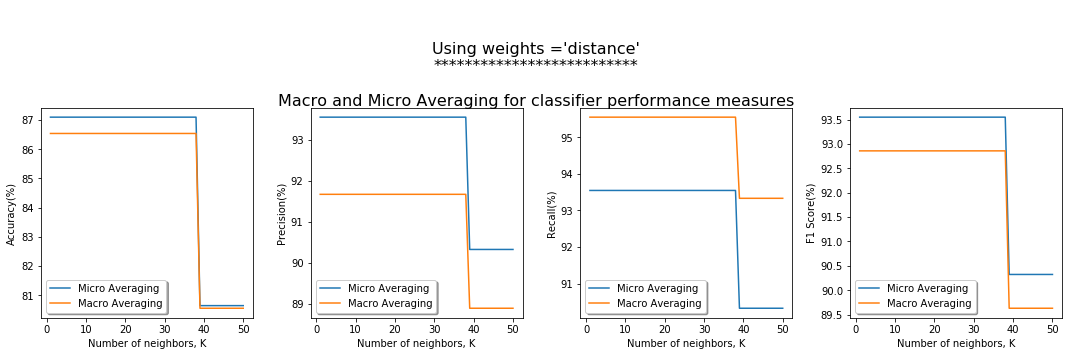

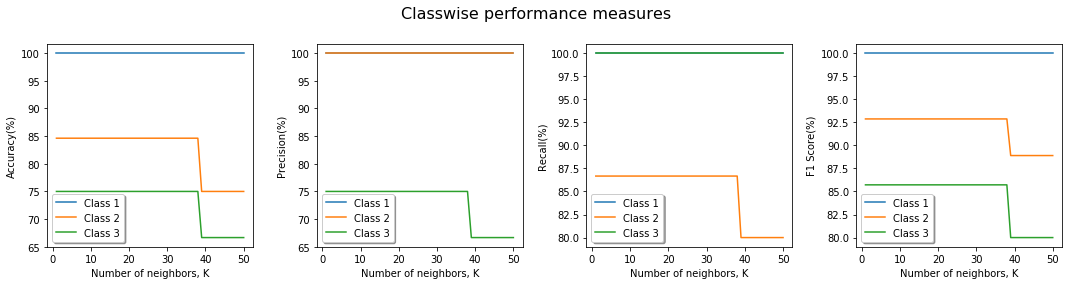

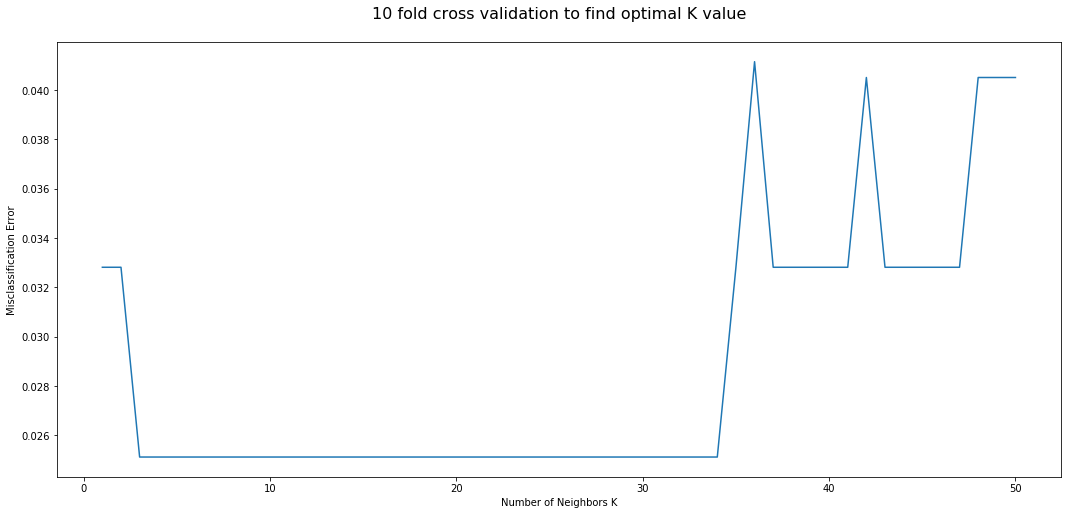

* The optimal number of neighbors is 3 for 'distance' weights
* The least optimal number of neighbors is 36 for 'distance' weights
* The average misclassification percentage = 2.8667832167832126% for 'distance' weights


In [22]:
KNN(Xtrain, Xtest,ytrain, ytest)

## Question 2
2) Use PCA to reduce the iris data set to 2 components, then repeat the experiment you did in part 1). Plot the classification regions and the testing data (you can directly modify the PCA chunk of code provided above) to show the best classifier and the worst classifier. Comment on the results. You should comment on the bias and variance of the best and worst classifiers.

## Analysis:

1) Based on the below results optimal and least optimal K values are:

* The optimal number of neighbors is 7 for 'uniform' weights
* The least optimal number of neighbors is 49 for 'uniform' weights
* The optimal number of neighbors is 6 for 'distance' weights
* The least optimal number of neighbors is 45 for 'distance' weights

2) Best weights for classifier

* The average misclassification percentage = 7.82151515152 % for 'distance' weights
* The average misclassification percentage = 4.86575757576 % for 'uniform' weights

We can see from above that using a distance weight provides less overall misclassification. Moreover by definition:

* 'uniform weights': All points in each neighborhood are weighted equally.
* ‘distance weights’: weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.


As weights functions are used for prediction (which is essentially the voting system), I believe that using "distance" weights is a better voting system and a slightly more principled approach that giving arbitrary weights as in uniform weights. By which I conclude that using "distance" weights are better classifiers than "uniform" weights.

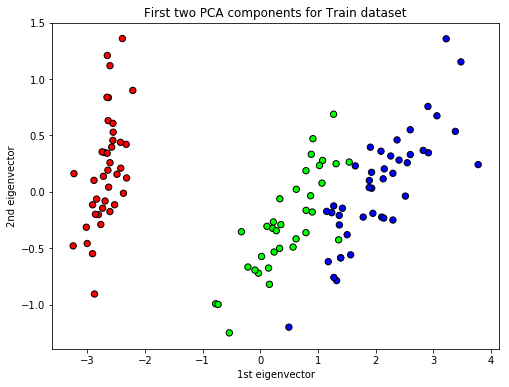

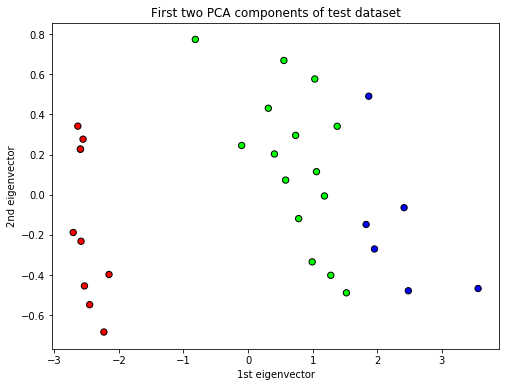

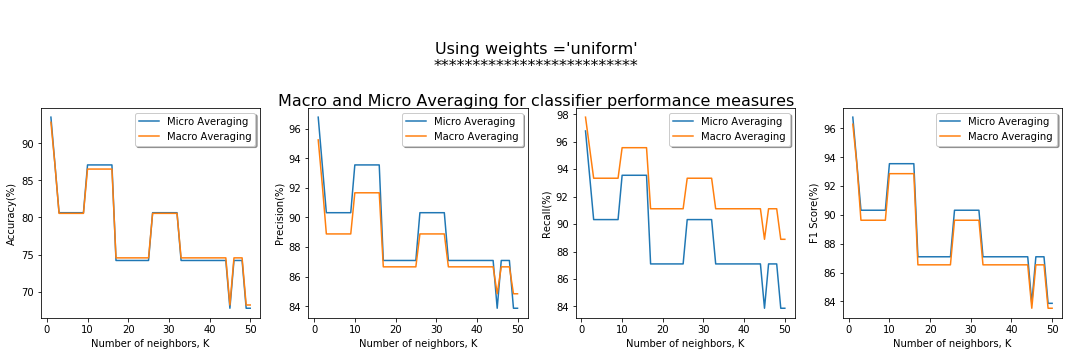

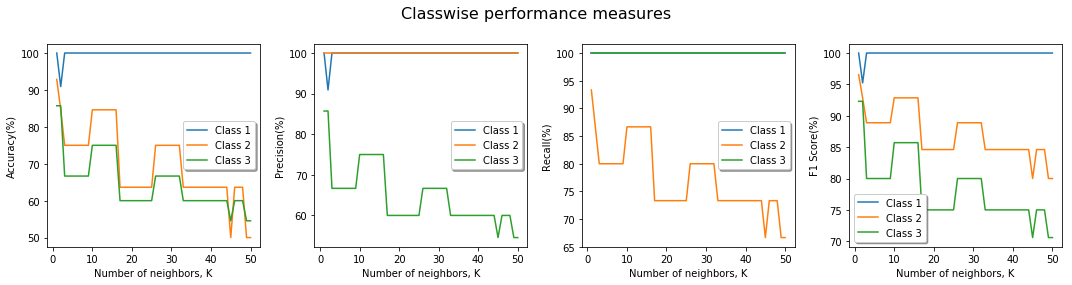

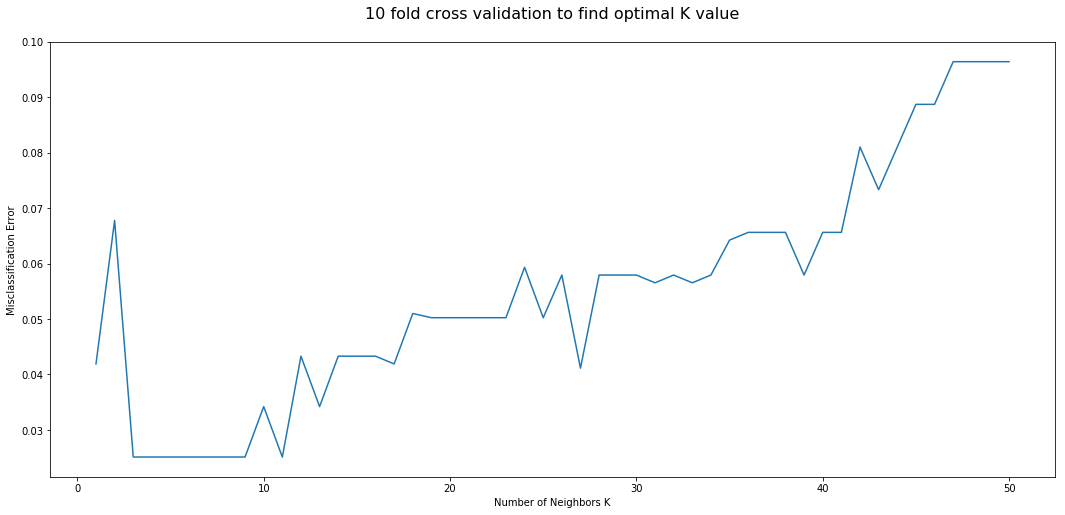

* The optimal number of neighbors is 3 for 'uniform' weights
* The least optimal number of neighbors is 47 for 'uniform' weights
* The average misclassification percentage = 5.51212121212121% for 'uniform' weights


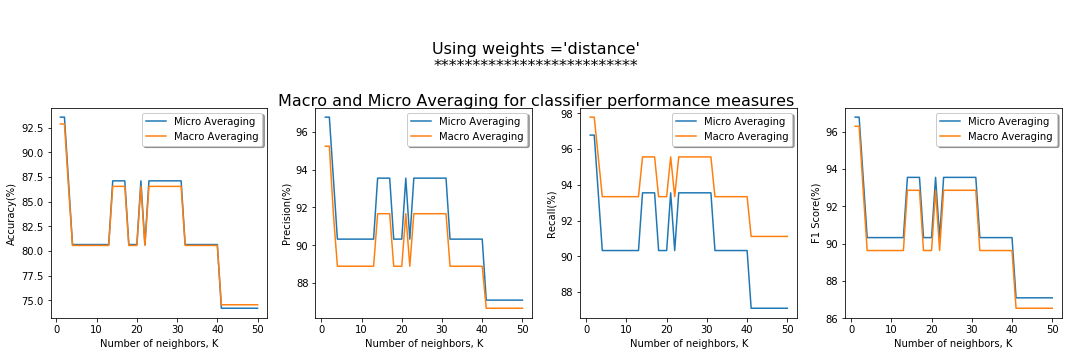

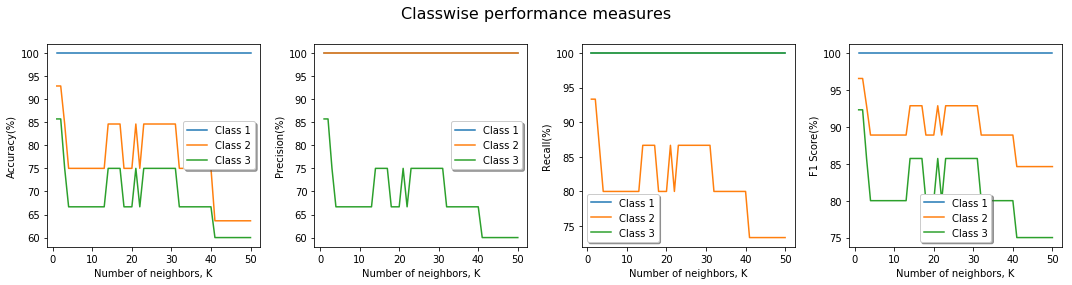

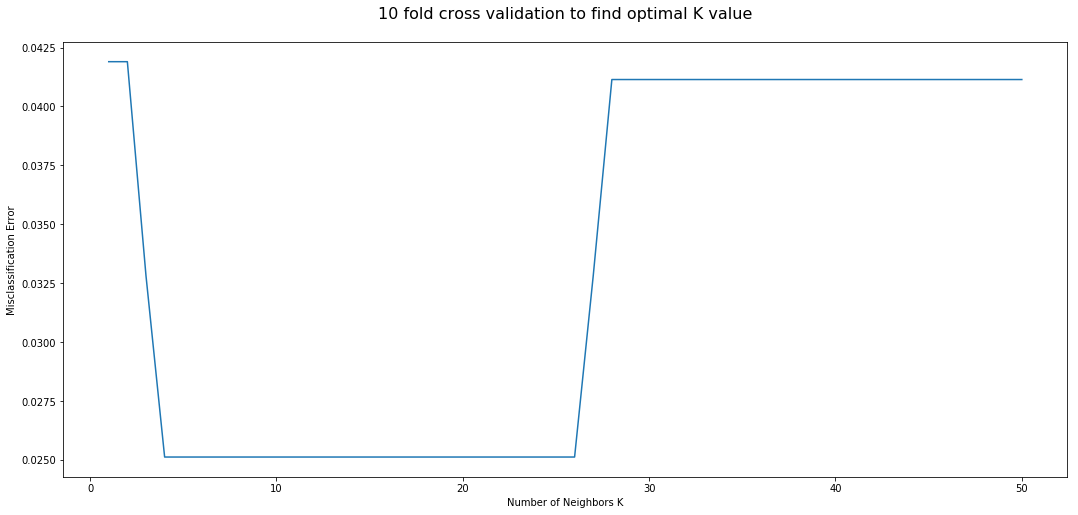

* The optimal number of neighbors is 4 for 'distance' weights
* The least optimal number of neighbors is 1 for 'distance' weights
* The average misclassification percentage = 3.3467365967365907% for 'distance' weights


In [23]:
# Use PCA to reduce the dimensions of the IRIS dataset to 2 components for both test and train dataset.
X_reduced_train = PCA(n_components=2).fit_transform(Xtrain)
X_reduced_test = PCA(n_components=2).fit_transform(Xtest)

# Plot the 2 PCA components of training data
fig = plt.figure(1, figsize=(8, 6))
plt.scatter(X_reduced_train[:, 0], X_reduced_train[:, 1], c=ytrain,cmap=cmap_bold, edgecolor='k', s=40)
plt.title("First two PCA components for Train dataset")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

# Plot the 2 PCA components of testing data
fig = plt.figure(1, figsize=(8, 6))
plt.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=ytest,cmap=cmap_bold, edgecolor='k', s=40)
plt.title("First two PCA components of test dataset")
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")
plt.show()

# Calling the KNN function defined above to calculate the performance measures and also get optimal and worst K values
KNN(X_reduced_train,X_reduced_test,ytrain,ytest)

### Best and Worst Classifier plots:

From above we know that:

* The optimal number of neighbors is 7 for 'uniform' weights
* The least optimal number of neighbors is 49 for 'uniform' weights
* The optimal number of neighbors is 6 for 'distance' weights

The least optimal number of neighbors is 45 for 'distance' weights
Using these K values, We will plotting the classification regions for best and worst classification:

As we can see from the plots:

* Optimal K values have good tradeoff between the bias and variance.
* Least optimal K values have high K value and high amount of smoothing resulting in high bias and low variance.

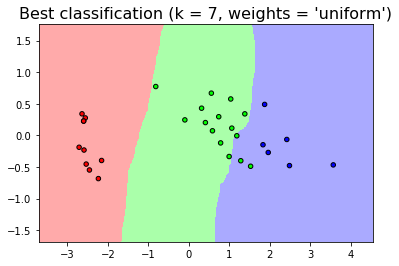

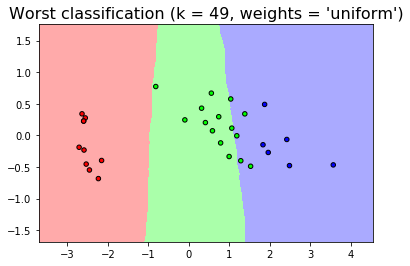

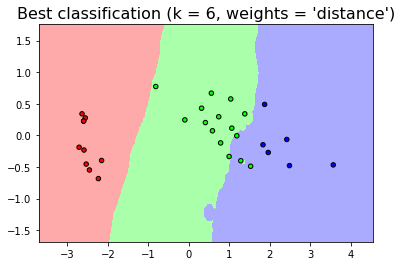

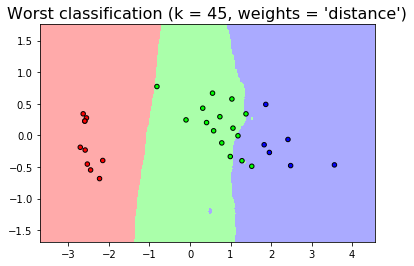

In [24]:
for weights in ['uniform', 'distance']:
    if weights=='uniform':
        k_list = [7,49]
    else:
        k_list= [6,45]
    
    for ind,K in enumerate(k_list):
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(K, weights=weights)
        clf.fit(X_reduced_train, ytrain)
    
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_reduced_test[:, 0].min() - 1, X_reduced_test[:, 0].max() + 1
        y_min, y_max = X_reduced_test[:, 1].min() - 1, X_reduced_test[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
        py.figure()
        py.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        py.scatter(X_reduced_test[:, 0], X_reduced_test[:, 1], c=ytest, cmap=cmap_bold,edgecolor='k', s=20)
        py.xlim(xx.min(), xx.max())
        py.ylim(yy.min(), yy.max())
        if (ind == 0):
            py.title("Best classification (k = %i, weights = '%s')"% (K, weights),fontsize=16)
        else:
            py.title("Worst classification (k = %i, weights = '%s')"% (K, weights),fontsize=16)

        py.show()

In [25]:
pwd

'C:\\Users\\sriha'